# Stripes

In [1]:
import xarray
import matplotlib.pyplot as plt

In [2]:
ds = xarray.open_dataset("CMIP6.nc")

In [3]:
ds

<xarray.Dataset>
Dimensions:     (model: 35, experiment: 5, region: 59, realm: 3, time: 3012)
Coordinates:
  * model       (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * experiment  (experiment) object 'historical' 'ssp126' ... 'ssp370' 'ssp585'
  * region      (region) object 'world' 'ARO' 'ARP' 'ARS' ... 'WNA' 'WSAF' 'WSB'
  * realm       (realm) object 'land' 'sea' 'landsea'
  * time        (time) object '1850-01' '1850-02' ... '2100-11' '2100-12'
Data variables:
    tas         (model, experiment, region, realm, time) float32 ...
    pr          (model, experiment, region, realm, time) float32 ...

In [4]:
tas = ds["tas"].sel(region="world", realm="landsea", experiment="ssp585").dropna("time", how="all")

In [5]:
tas

<xarray.DataArray 'tas' (model: 35, time: 1032)>
array([[12.967, 13.213, 13.822, ..., 20.049, 19.198, 18.62 ],
       [13.647, 13.957, 14.716, ..., 19.691, 18.77 , 18.181],
       [12.946, 13.33 , 13.832, ..., 19.059, 18.25 , 17.356],
       ...,
       [12.796, 13.205, 14.051, ..., 18.324, 17.329, 16.832],
       [12.736, 13.087, 14.014, ..., 20.136, 19.108, 18.502],
       [12.357, 12.586, 13.197, ..., 21.016, 20.042, 19.115]], dtype=float32)
Coordinates:
  * model       (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
    experiment  <U6 'ssp585'
    region      <U5 'world'
    realm       <U7 'landsea'
  * time        (time) object '2015-01' '2015-02' ... '2100-11' '2100-12'

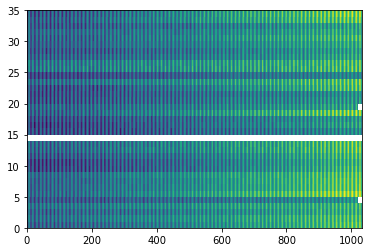

In [6]:
plt.pcolormesh(tas.values)

# Reference regions

In [7]:
import pandas as pd
import geopandas as gpd
import geoplot

In [9]:
gdf = gpd.read_file("ATLAS/reference-regions/IPCC-WGI-reference-regions-v4.geojson")
gdf = gdf.set_index("Acronym")
data = pd.read_csv("CMIP6.csv")

tas_means = data[["region", "tas"]].groupby(["region"]).mean()
pr_means  = data[["region", "pr"]].groupby(["region"]).mean()

/home/zequi/miniconda3/lib/python3.9/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<AxesSubplot:>

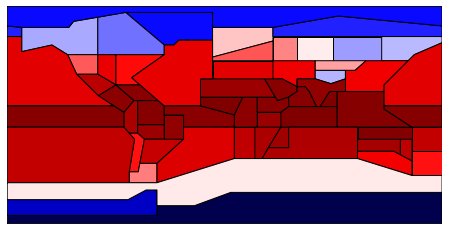

In [10]:
geoplot.choropleth(gdf, hue=tas_means["tas"], cmap='seismic', figsize=(8,4))

<AxesSubplot:>

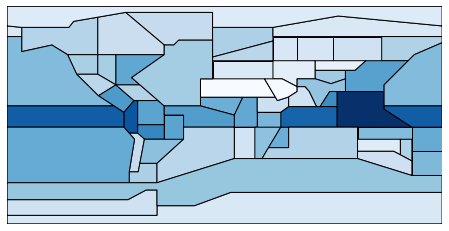

In [11]:
geoplot.choropleth(gdf, hue=pr_means["pr"], cmap='Blues', figsize=(8,4))